# Explanation and Discussion to be done

In [1]:
import osmnx as ox
import networkx as nx
from IPython.display import IFrame, HTML
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import sys, random
from utilities import *
from itertools import filterfalse, chain

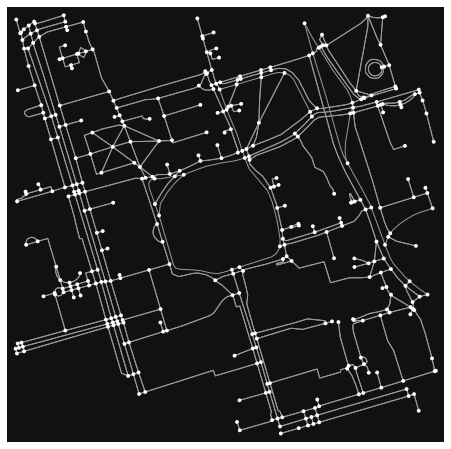

In [2]:
location_point = (43.661667, -79.395)
G = ox.graph_from_point(location_point, dist=300, clean_periphery=True, simplify=True)
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)
fig, ax = ox.plot_graph(G)

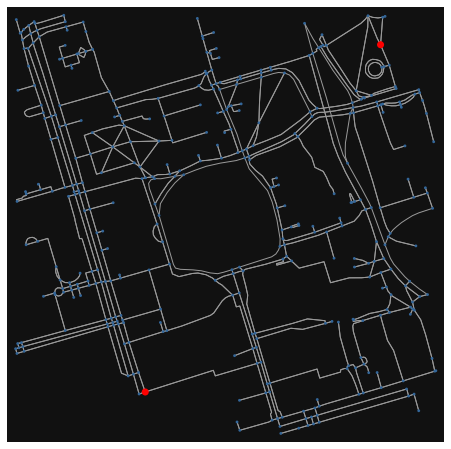

In [3]:
# marking both the source and destination node

nc = ['r' if node == 389677909 or node == 55808290 else '#336699' for node in G.nodes()]
ns = [50 if node == 389677909 or node == 55808290 else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

In [4]:
%%capture
source(Node)

In [5]:
origin = Node(graph = G, osmid = 55808290)
destination = Node(graph = G, osmid = 389677909)

In [6]:
particles_swarm = 200

In [7]:
particles = [randomized_search(G, 55808290, 389677909) for _ in range(particles_swarm)]

In [8]:
num_of_swarms = 4

In [9]:
num_of_iterations = 50

In [10]:
from itertools import product
from random import choice

In [11]:
for iteration in range(num_of_iterations):
    # we need to have `num_of_swarms` particles to lead
    # a swarm and be its lbest ... that changes every iteration
    particles.sort(key = lambda particle : cost(G, particle))
    swarm_particles = particles_swarm // num_of_swarms
    
    leaders = particles[:swarm_particles][:]
    
    for i in range(num_of_swarms): 
        particles[i] , particles[i * (swarm_particles) - 1] = particles[i * (swarm_particles) - 1], particles[i]
    
    swarms = list()
    
    for i in range(num_of_swarms):
        swarms.append(particles[i * (swarm_particles): i*(swarm_particles) + swarm_particles])
    
    # for each swarm follow the leader of the swarm
    def follow_leader_local(population):
        for i in range(1, len(population)):
            population[i] = cross_over(population[0], population[i]) # this is what we are doing
            
    for swarm in swarms:
        follow_leader_local(swarm)
    
    def follow_leader_global():
        for u, v in product(range(0, len(leaders)), range(0, len(leaders))):
            tobeMutated = choice([u, v])
            leaders[tobeMutated] = cross_over(leaders[u], leaders[v])
            
    follow_leader_global()
    
    # adding the new leaders
    
    for i in range(num_of_swarms):
        particles[i*(swarm_particles - 1)] = leaders[i]

In [12]:
route = min(particles, key = lambda particle : cost(G, particle))

In [13]:
cost(G,route)

801.9469999999999

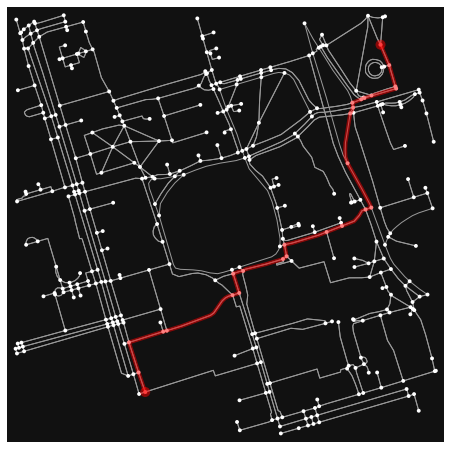

In [14]:
fig, ax = ox.plot_graph_route(G, route)